<a href="https://colab.research.google.com/github/ozh-ai/Tiktok-Tech-Jam-2025/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [304]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin

import json
import re

In [305]:
# a. Data Collection

df = pd.read_csv("data/reviews_labeled.csv")

In [306]:
# b. Exploratory Data Analysis

df.head(10)

,business_name,author_name,text,photo,rating,rating_category,label
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday. We chose this restaurant as a place for dinner based on the reviews and because we wanted juicy food. When we first went there was a serious queue. You proceed by taking the food you want in the form of an open buffet. Both vegetable dishes and meat dishes were plentiful. There was also dessert for those who wanted it. After you get what you want you pay at the cashier. They don't go through cards they work in cash. There was a lot of food variety. And the food prices were unbelievably cheap. We paid only 84 TL for all the meals here. It included buttermilk and bread. But unfortunately I can't say it's too clean as a place..,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,normal
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to fit the food. It's really good that the food is cheap and nice. Eating as much bread as you want is a big plus for those who are not satisfied without bread. It is a place that I can recommend to those who will go to Marmaris. On July 1 there was a small increase but even the price hike is cheap. I leave the photo of the latest prices and breakfast below. there was a serious queue. You proceed by taking the food you want in the form of an open buffet. Both vegetable dishes and meat dishes were plentiful. There was also dessert for those who wanted it. After you get what you want you pay at the cashier. They don't go through cards they work in cash. There was a lot of food variety. And the food prices were unbelievably cheap. We paid only 84 TL for all the meals here. It included buttermilk and bread. But unfortunately I can't say it's too clean as a place..,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,normal
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the photo cost 108 liras. You have to wait 10-15 minutes for food. Staff is annoying. Well it tastes good. Boiled meat was delicious.,dataset/outdoor_atmosphere/hacinin_yeri_yasin_kuyu.png,3,outdoor_atmosphere,normal
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its food is delicious!,dataset/indoor_atmosphere/hacinin_yeri_orhan_kapu.png,5,indoor_atmosphere,normal
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms of price performance point; taste; but yigit restaurant writes a big plus for those who come to work in this region.,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,normal
5,Haci'nin Yeri - Yigit Lokantasi,Arda Karaca,Generally good.,dataset/indoor_atmosphere/hacinin_yeri_arda_karaca.png,4,indoor_atmosphere,normal
6,Haci'nin Yeri - Yigit Lokantasi,İrem Eren,What you see is 125 TL in total. It's a pretty convenient place. We can say that it is an artisan restaurant; you should not expect a restaurant; but they are still quite good in terms of price and performance. As of July 1; prices will increase,dataset/taste/hacinin_yeri_irem_eren.png,5,taste,normal
7,Haci'nin Yeri - Yigit Lokantasi,Nadia Salim,Delicious food at rock bottom prices. Friendly staff; Highly recommend,dataset/taste/hacinin_yeri_nadia_salim.png,5,taste,normal
8,Haci'nin Yeri - Yigit Lokantasi,Mehmet Eser,"Every time I go, I still experience the amazement I experienced years ago as if it were the first time. There is no need to explain. Folk hero is a business.",dataset/outdoor_atmosphere/hacinin_yeri_mehmet_eser.png,5,outdoor_atmosphere,normal
9,Haci'nin Yeri - Yigit Lokantasi,Celal Ozer,The most f/p of all businesses I've seen.,dataset/indoor_atmosphere/hacinin_yeri_celal_ozer.png,5,indoor_atmosphere,normal


In [307]:
df.shape

(1945, 7)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1945 non-null   object
 1   author_name      1945 non-null   object
 2   text             1945 non-null   object
 3   photo            1601 non-null   object
 4   rating           1945 non-null   int64 
 5   rating_category  1945 non-null   object
 6   label            1945 non-null   object
dtypes: int64(1), object(6)
memory usage: 106.5+ KB


In [309]:
df['label'].nunique()

4

In [310]:
df['label'].value_counts()

label
normal           1100
advertisement     297
non_visitor       276
irrelevant        272
Name: count, dtype: int64

In [311]:
# c. Feature Engineering

encode = {"normal":0, "advertisement":1, "irrelevant":2, "non_visitor":3}
df['label_encode'] = df['label'].map(encode)


In [312]:
df.head(10)

,business_name,author_name,text,photo,rating,rating_category,label,label_encode
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday. We chose this restaurant as a place for dinner based on the reviews and because we wanted juicy food. When we first went there was a serious queue. You proceed by taking the food you want in the form of an open buffet. Both vegetable dishes and meat dishes were plentiful. There was also dessert for those who wanted it. After you get what you want you pay at the cashier. They don't go through cards they work in cash. There was a lot of food variety. And the food prices were unbelievably cheap. We paid only 84 TL for all the meals here. It included buttermilk and bread. But unfortunately I can't say it's too clean as a place..,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,normal,0
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to fit the food. It's really good that the food is cheap and nice. Eating as much bread as you want is a big plus for those who are not satisfied without bread. It is a place that I can recommend to those who will go to Marmaris. On July 1 there was a small increase but even the price hike is cheap. I leave the photo of the latest prices and breakfast below. there was a serious queue. You proceed by taking the food you want in the form of an open buffet. Both vegetable dishes and meat dishes were plentiful. There was also dessert for those who wanted it. After you get what you want you pay at the cashier. They don't go through cards they work in cash. There was a lot of food variety. And the food prices were unbelievably cheap. We paid only 84 TL for all the meals here. It included buttermilk and bread. But unfortunately I can't say it's too clean as a place..,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,normal,0
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the photo cost 108 liras. You have to wait 10-15 minutes for food. Staff is annoying. Well it tastes good. Boiled meat was delicious.,dataset/outdoor_atmosphere/hacinin_yeri_yasin_kuyu.png,3,outdoor_atmosphere,normal,0
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its food is delicious!,dataset/indoor_atmosphere/hacinin_yeri_orhan_kapu.png,5,indoor_atmosphere,normal,0
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms of price performance point; taste; but yigit restaurant writes a big plus for those who come to work in this region.,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,normal,0
5,Haci'nin Yeri - Yigit Lokantasi,Arda Karaca,Generally good.,dataset/indoor_atmosphere/hacinin_yeri_arda_karaca.png,4,indoor_atmosphere,normal,0
6,Haci'nin Yeri - Yigit Lokantasi,İrem Eren,What you see is 125 TL in total. It's a pretty convenient place. We can say that it is an artisan restaurant; you should not expect a restaurant; but they are still quite good in terms of price and performance. As of July 1; prices will increase,dataset/taste/hacinin_yeri_irem_eren.png,5,taste,normal,0
7,Haci'nin Yeri - Yigit Lokantasi,Nadia Salim,Delicious food at rock bottom prices. Friendly staff; Highly recommend,dataset/taste/hacinin_yeri_nadia_salim.png,5,taste,normal,0
8,Haci'nin Yeri - Yigit Lokantasi,Mehmet Eser,"Every time I go, I still experience the amazement I experienced years ago as if it were the first time. There is no need to explain. Folk hero is a business.",dataset/outdoor_atmosphere/hacinin_yeri_mehmet_eser.png,5,outdoor_atmosphere,normal,0
9,Haci'nin Yeri - Yigit Lokantasi,Celal Ozer,The most f/p of all businesses I've seen.,dataset/indoor_atmosphere/hacinin_yeri_celal_ozer.png,5,indoor_atmosphere,normal,0


In [313]:
df['text_length'] = df['text'].apply(len)

In [314]:
df.head(10)

,business_name,author_name,text,photo,rating,rating_category,label,label_encode,text_length
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday. We chose this restaurant as a place for dinner based on the reviews and because we wanted juicy food. When we first went there was a serious queue. You proceed by taking the food you want in the form of an open buffet. Both vegetable dishes and meat dishes were plentiful. There was also dessert for those who wanted it. After you get what you want you pay at the cashier. They don't go through cards they work in cash. There was a lot of food variety. And the food prices were unbelievably cheap. We paid only 84 TL for all the meals here. It included buttermilk and bread. But unfortunately I can't say it's too clean as a place..,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,normal,0,680
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to fit the food. It's really good that the food is cheap and nice. Eating as much bread as you want is a big plus for those who are not satisfied without bread. It is a place that I can recommend to those who will go to Marmaris. On July 1 there was a small increase but even the price hike is cheap. I leave the photo of the latest prices and breakfast below. there was a serious queue. You proceed by taking the food you want in the form of an open buffet. Both vegetable dishes and meat dishes were plentiful. There was also dessert for those who wanted it. After you get what you want you pay at the cashier. They don't go through cards they work in cash. There was a lot of food variety. And the food prices were unbelievably cheap. We paid only 84 TL for all the meals here. It included buttermilk and bread. But unfortunately I can't say it's too clean as a place..,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,normal,0,914
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the photo cost 108 liras. You have to wait 10-15 minutes for food. Staff is annoying. Well it tastes good. Boiled meat was delicious.,dataset/outdoor_atmosphere/hacinin_yeri_yasin_kuyu.png,3,outdoor_atmosphere,normal,0,173
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its food is delicious!,dataset/indoor_atmosphere/hacinin_yeri_orhan_kapu.png,5,indoor_atmosphere,normal,0,63
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms of price performance point; taste; but yigit restaurant writes a big plus for those who come to work in this region.,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,normal,0,161
5,Haci'nin Yeri - Yigit Lokantasi,Arda Karaca,Generally good.,dataset/indoor_atmosphere/hacinin_yeri_arda_karaca.png,4,indoor_atmosphere,normal,0,15
6,Haci'nin Yeri - Yigit Lokantasi,İrem Eren,What you see is 125 TL in total. It's a pretty convenient place. We can say that it is an artisan restaurant; you should not expect a restaurant; but they are still quite good in terms of price and performance. As of July 1; prices will increase,dataset/taste/hacinin_yeri_irem_eren.png,5,taste,normal,0,245
7,Haci'nin Yeri - Yigit Lokantasi,Nadia Salim,Delicious food at rock bottom prices. Friendly staff; Highly recommend,dataset/taste/hacinin_yeri_nadia_salim.png,5,taste,normal,0,70
8,Haci'nin Yeri - Yigit Lokantasi,Mehmet Eser,"Every time I go, I still experience the amazement I experienced years ago as if it were the first time. There is no need to explain. Folk hero is a business.",dataset/outdoor_atmosphere/hacinin_yeri_mehmet_eser.png,5,outdoor_atmosphere,normal,0,157
9,Haci'nin Yeri - Yigit Lokantasi,Celal Ozer,The most f/p of all businesses I've seen.,dataset/indoor_atmosphere/hacinin_yeri_celal_ozer.png,5,indoor_atmosphere,normal,0,41


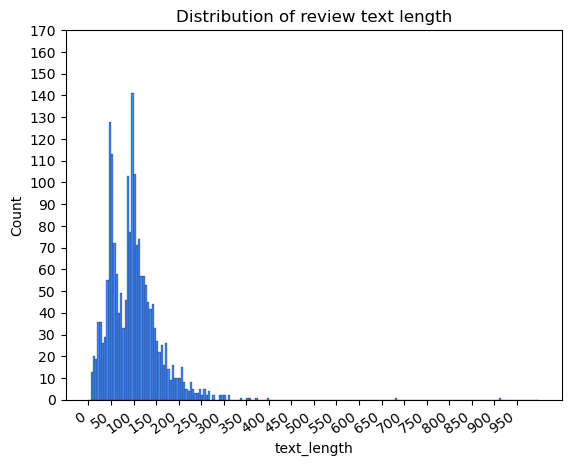

In [315]:
ax = sns.histplot(df['text_length'], binrange=(0, 1000), binwidth=5, color='#4285F4', alpha=1)

ax.set_xticks(range(0, 1000, 50))
ax.set_yticks(range(0, 180, 10))

plt.title('Distribution of review text length')
plt.xticks(rotation = 35, horizontalalignment = 'right')
plt.show()


In [316]:
X = df[['text', 'text_length']]
y = df['label_encode']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [317]:
class LinkDetector(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Regex to catch:
        #  - http/https URLs
        #  - www. links
        #  - Any domain with at least 2 letters in the extension
        self.pattern = re.compile(
            r'(https?://\S+|www\.\S+|\S+\.[a-z]{2,})',
            re.IGNORECASE
        )

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # X will be a pandas Series
        return X.str.contains(self.pattern).astype(int).to_frame(name="contains_link")

In [318]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2)), 'text'),
        ('num', StandardScaler(), ['text_length']),
        ('link', LinkDetector(), 'text')
    ],
    remainder='drop'
)

In [319]:
pipeline = Pipeline([
    ('features', preprocessor),
    ('classifier', XGBClassifier(
        objective="multi:softmax",
        num_class=4,
        eval_metric="mlogloss",
        learning_rate=0.1,
        max_depth=10,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

pipeline.fit(X_train, y_train)

C:\Users\zheng\AppData\Local\Temp\ipykernel_90684\1331857775.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return X.str.contains(self.pattern).astype(int).to_frame(name="contains_link")


Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=5000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'text'),
                                                 ('num', StandardScaler(),
                                                  ['text_length']),
                                                 ('link', LinkDetector(),
                                                  'text')])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsampl...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1, num_class=4, ...))])

In [320]:
# Evaluation
target_names = ["Normal", "Advertisement", "Irrelevant", "Non-visitor"]

y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       Normal       1.00      0.99      0.99       220
Advertisement       1.00      1.00      1.00        60
   Irrelevant       0.98      0.98      0.98        54
  Non-visitor       0.98      1.00      0.99        55

     accuracy                           0.99       389
    macro avg       0.99      0.99      0.99       389
 weighted avg       0.99      0.99      0.99       389

Confusion Matrix:
[[218   0   1   1]
 [  0  60   0   0]
 [  1   0  53   0]
 [  0   0   0  55]]


C:\Users\zheng\AppData\Local\Temp\ipykernel_90684\1331857775.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return X.str.contains(self.pattern).astype(int).to_frame(name="contains_link")


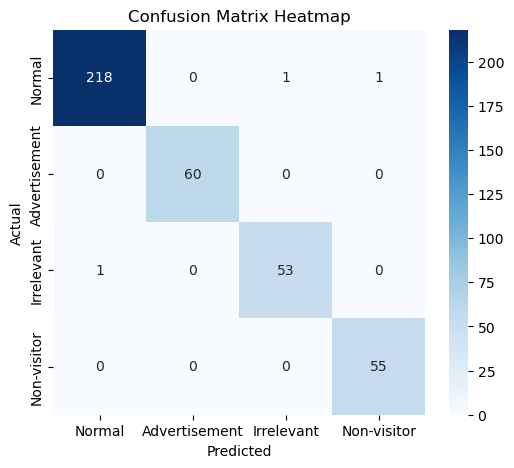

In [321]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

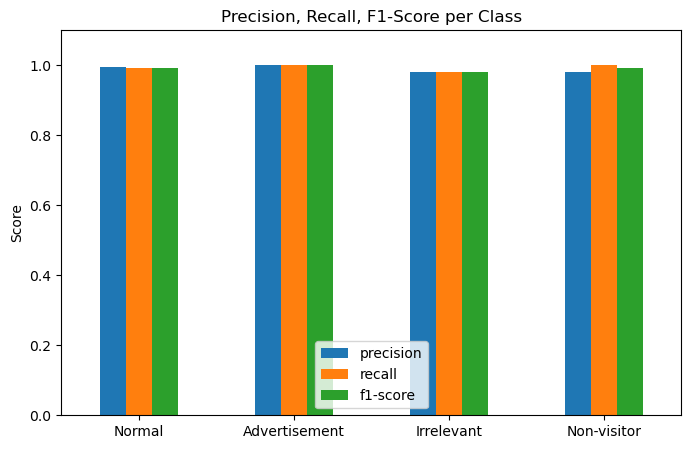

In [322]:
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:-3, :3]  # Exclude accuracy, macro avg, weighted avg
metrics_df.plot(kind='bar', figsize=(8,5))
plt.title("Precision, Recall, F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0,1.1)
plt.xticks(rotation=0)
plt.show()

# **Evaludation and Findings**

# **1. Dataset and Features**

- Multiclass labels:
`0 = Normal review`, `1 = Advertisement`, `2 = Irrelevant`, `3 = Non-visitor`.

Input features:

- Text: review_text (TF-IDF of unigrams + bigrams, max 5000 features)

- Metadata: text_length of review

- Training: XGBoostClassifier, 300 trees, max depth 10, learning rate 0.1

# **2. Performance Metrics**

- Overall accuracy: 99% on current test set

- Class-wise F1-score:

- Normal: 0.99

- Advertisement: 1.00

- Irrelevant: 0.98

- Non-visitor: 0.99

- Based on the confusion matrix, most misclassifications are rare, with a few normal reviews misclassified as irrelevant or from a non-visitor.

# **3. Insights**

- The model correctly identifies advertisements via keyword patterns (URLs, promotional terms).

- Non-visitor rants are captured with cues like exaggerated complaints or generic negative language.

- Short or off-topic reviews are flagged as irrelevant.

- Most normal reviews contain genuine comments about the location and are accurately classified.

# **4. Limitations**

- Current dataset is small; perfect accuracy may not generalize to larger, more diverse reviews.

- XGBoost Classifer might overfit on the data and perform poorly on external datasets.

- Some overlapping language between ads and normal positive reviews could be misclassified in larger datasets.

- Relevancy detection is partially heuristic; additional features like GPS proximity or user history could improve robustness.

# **5. Recommendations**

- Deploy as a review quality filter API, flagging potential spam/irrelevant reviews before publishing.

- Extend the model with additional metadata: user review history, posting time, or location distance.

- Consider ensemble with transformer embeddings (BERT or RoBERTa) for improved semantic understanding in complex reviews.

- Continuously evaluate on incoming review data to maintain high accuracy.

# **Test on another dataset (Demo)**

In [326]:
with open("data/Alaska.json", "r", encoding="utf-8") as f:
    raw = f.read()

# Replace single quotes with double quotes (basic fix)
fixed_json_str = raw.replace("'", '"')

with open("data/Alaska_fixed.json", "w", encoding="utf-8") as f:
    f.write(fixed_json_str)

In [327]:
data_list = []

with open("data/Alaska_fixed.json", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue

        # Replace only keys' single quotes with double quotes (avoid breaking text)
        # Example: {'key': 'value'} -> {"key": "value"}
        line_fixed = re.sub(r"(?<=\{|,)\s*'([^']+)'\s*:", r'"\1":', line)
        line_fixed = re.sub(r":\s*'([^']*)'", r': "\1"', line_fixed)

        try:
            obj = json.loads(line_fixed)
            data_list.append(obj)
        except json.JSONDecodeError as e:
            continue

# Convert to DataFrame
Alaska_data = pd.json_normalize(data_list)

In [328]:
Alaska_data.head(10)

,user_id,name,time,rating,text,pics,resp,gmap_id,resp.time,resp.text
0,109129804842686204152,Nicki Gore,1566331951619,5,"We always stay here when in Valdez for silver salmon fishing. The elderly couple that run it are amazing to talk to, extremely helpful. The campsites are very well maintained.",None,NaN,0x56b646ed2220b77f:0xd8975e316de80952,NaN,NaN
1,113240926405758965692,Allen Ratliff,1504917982385,5,"Great campground for the price. Nice hot unlimited showers, laundy, and spacious wooded lots. Full hook ups. Late check in available.",None,NaN,0x56b646ed2220b77f:0xd8975e316de80952,NaN,NaN
2,115738865548796071801,Victoria Cook,1466170294782,5,"Great, slept like a bear. Clean, convenient, cute, the owners are a hoot.",None,NaN,0x56b646ed2220b77f:0xd8975e316de80952,NaN,NaN
3,115658246644483827476,Crystal Dahle,1630382185833,2,Not a lot going on here since it moved from downtown. Check out a farmers market somewhere else. Try find where Grandma Wei moved to!,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
4,116978519893930605788,Holly Anne,1629595392534,4,None,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
5,109748980961787042558,Emma Forsberg,1629598102068,5,None,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
6,106927921983372472765,sherry miller,1630540491895,5,None,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
7,117655458045608856003,Amy Lieb,1630292802235,4,None,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
8,108676492248120451765,Cre•dence 52,1630669457601,5,Matt was honest and did the work done as promised date.,None,NaN,0x56c8e0455225be87:0xf24828df75e2f8ae,NaN,NaN
9,110352467269495760166,Jennifer Seutter,1559572834719,5,"Always great service, honest and fast.",None,NaN,0x56c8e0455225be87:0xf24828df75e2f8ae,NaN,NaN


In [329]:
Alaska_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457338 entries, 0 to 457337
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    457338 non-null  object 
 1   name       457338 non-null  object 
 2   time       457338 non-null  int64  
 3   rating     457338 non-null  int64  
 4   text       237306 non-null  object 
 5   pics       16428 non-null   object 
 6   resp       0 non-null       float64
 7   gmap_id    457338 non-null  object 
 8   resp.time  30638 non-null   float64
 9   resp.text  30638 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 34.9+ MB


In [330]:
Alaska_data.shape

(457338, 10)

In [331]:
Alaska_data = Alaska_data[['text']]

In [383]:
violation_data = pd.read_csv("data/60000_reviews.csv")
violation_data = violation_data[['text']]

In [385]:
violation_data.head(10)

,text
0,"My friend told me the experience was terrible. I would need to go there personally to leave a proper review. From what I saw online, it looks amazing. I haven't visited Business6, but heard it is amazing."
1,Limited time offer for family dinner! SPECIAL OFFER! Enjoy 31% OFF on burger at Business33!
2,"I haven't visited Business100, but heard it is hidden gem. From what I saw online, it looks popular. My friend told me the experience was amazing."
3,"From what I saw online, it looks terrible. I would need to go there personally to leave a proper review."
4,"I would need to go there personally to leave a proper review. I haven't visited Business61, but heard it is terrible."
5,"I would need to go there personally to leave a proper review. I haven't visited Business1, but heard it is hidden gem. From what I saw online, it looks overrated. My friend told me the experience was amazing."
6,"From what I saw online, it looks amazing. I would need to go there personally to leave a proper review. I haven't visited Business94, but heard it is popular. My friend told me the experience was overrated."
7,SPECIAL OFFER! Enjoy 50% OFF on pizza at Business18! Limited time offer for birthday party! Book now at book8.com to reserve your table.
8,Visit www.deals44.com for more details. Limited time offer for family dinner! Book now at book90.com to reserve your table.
9,Book now at book9.com to reserve your table. SPECIAL OFFER! Enjoy 23% OFF on steak at Business84! Limited time offer for date night!


In [387]:
data = pd.concat([Alaska_data, violation_data], axis = 0)
data = data.reset_index(drop = True)

data.sample(10)

,text
258447,None
225074,Scones!!!!!!!
15558,"Got what I needed, in and out. Great service."
376058,None
460293,"My friend told me the experience was overrated. I haven't visited Business94, but heard it is terrible."
86126,So friendly
145910,None
327836,None
482133,"My friend told me the experience was terrible. From what I saw online, it looks amazing. I haven't visited Business96, but heard it is popular. I would need to go there personally to leave a proper review."
381612,None


In [389]:
data.dropna(subset=['text'], inplace = True)

In [391]:
data.shape

(297306, 1)

In [393]:
data['text_length'] = data['text'].apply(len)

In [395]:
data.head(10)

,text,text_length
0,"We always stay here when in Valdez for silver salmon fishing. The elderly couple that run it are amazing to talk to, extremely helpful. The campsites are very well maintained.",175
1,"Great campground for the price. Nice hot unlimited showers, laundy, and spacious wooded lots. Full hook ups. Late check in available.",134
2,"Great, slept like a bear. Clean, convenient, cute, the owners are a hoot.",73
3,Not a lot going on here since it moved from downtown. Check out a farmers market somewhere else. Try find where Grandma Wei moved to!,133
8,Matt was honest and did the work done as promised date.,55
9,"Always great service, honest and fast.",38
10,Probably the best service in the Valley.,40
11,Fixed camper,12
14,It is the most beautiful awesome clean smelling air that I have ever came back to from down south and you will never find another place like it,143
18,Nice Room. Get to Know Other Guest. Makes aBetter Stay Being Considerate and Friendly!,86


In [397]:
# Select features in the same format as training
X_data = data[['text', 'text_length']]

# Predict
data_preds = pipeline.predict(X_data)

# Add predictions to the dataset
data['predicted_label'] = data_preds

# Optional: map numeric labels to names
label_map = {0: "Normal", 1: "Advertisement", 2: "Irrelevant", 3: "Non-visitor"}
data['predicted_label_name'] = data['predicted_label'].map(label_map)

C:\Users\zheng\AppData\Local\Temp\ipykernel_90684\1331857775.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return X.str.contains(self.pattern).astype(int).to_frame(name="contains_link")


In [401]:
# View results
# Show long text in a single line
pd.set_option('display.max_colwidth', None)  # or a large number like 200
pd.set_option('display.width', 1000)        # total width of the table
pd.set_option('display.colheader_justify', 'left')

# Display 20 random samples from the 2 columns
display(data[['text', 'predicted_label_name']].sample(20))

,text,predicted_label_name
315034,Expensive but fun,Normal
360343,Great bread and delicious confections. Personable staff and wonderful location.,Normal
505432,"From what I saw online, it looks popular. My friend told me the experience was overrated. I haven't visited Business39, but heard it is popular.",Normal
477206,"My favorite food is steak, but I haven't tried Business36. I also read about biography, totally unrelated to this place. The sky is rainy today and it made me think about biography. I spent the afternoon cycling, which was more interesting than reviewing restaurants.",Normal
189184,Quick and able to answer questions.,Normal
155059,Excellent,Normal
430966,Largest conference facility with attached hotel. Upgraded rooms and excellent dining options. Conveniently located downtown,Normal
154698,"Fresh, sweet and delicious. These folks stayed open throughout the virus hideout. Good on ya",Normal
358475,"Wish they could get their shelf prices to match what actually rings up. Every item I bought rang up more than the shelf price. No point in trying to say anything, the poor staff look worn out.",Normal
269824,Quick and delicious!,Normal
